# N<span style="color: #99ffff;">-</span>AND ITALIA <span style="color: #99ffff;">-</span> ADEBANJI ADELOWO

## Working with the DataBase: VENPAYBI

### The Table dbo.CoffeeCappTransByMerchantInstantKpis

In [78]:
import os
import sys
import warnings
warnings.filterwarnings('ignore')

In [79]:
import pyodbc
pyodbc.drivers()

['SQL Server',
 'Microsoft Access Driver (*.mdb, *.accdb)',
 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)',
 'Microsoft Access Text Driver (*.txt, *.csv)',
 'SQL Server Native Client RDA 11.0',
 'ODBC Driver 17 for SQL Server']

First establish connection to the database using python

In [80]:
import pandas as pd
import matplotlib.pyplot as plt


# server = 'localhost\sqlexpress' # for a named instance
# server = 'myserver,port' # to specify an alternate port
server = 'vpay-asdmi.public.21203d2a181c.database.windows.net,3342' 
database = 'VENPAY-BI' 
username = 'nandaa' 
password = 'Timileyin1998'  

engine = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = engine.cursor()

In [81]:

sql = "SELECT TOP (100) * FROM CoffeeCappTransByMerchantInstantKpis"

df_coffee1 = pd.read_sql(sql, engine)
df_coffee1.head()

,PK_CoffeeCappTransByMerchantInstantKpisId,ReferenceDate,EK_MerchantId,MerchantName,TotalTransactionsCounter,CompletedTransactionsCounter,ValidationErrorsCounter,ConnectionErrorsCounter,RejectionErrorsCounter,SystemErrorsCounter
0,1,2022-11-30 13:55:00,1,Vending Company,0,0,0,0,0,0
1,2,2022-11-30 13:55:00,2,BiTX,0,0,0,0,0,0
2,3,2022-11-30 13:55:00,4,Vaportris,0,0,0,0,0,0
3,4,2022-11-30 13:55:00,6,EOS Srl,0,0,0,0,0,0
4,5,2022-11-30 13:55:00,7,Your Best Break,1089,915,50,98,26,0


In [82]:
df_coffee1.columns

Index(['PK_CoffeeCappTransByMerchantInstantKpisId', 'ReferenceDate',
       'EK_MerchantId', 'MerchantName', 'TotalTransactionsCounter',
       'CompletedTransactionsCounter', 'ValidationErrorsCounter',
       'ConnectionErrorsCounter', 'RejectionErrorsCounter',
       'SystemErrorsCounter'],
      dtype='object')

In [83]:
df_coffee1.describe()

,PK_CoffeeCappTransByMerchantInstantKpisId,EK_MerchantId,TotalTransactionsCounter,CompletedTransactionsCounter,ValidationErrorsCounter,ConnectionErrorsCounter,RejectionErrorsCounter,SystemErrorsCounter
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.0
mean,50.500000,42.080000,28.000000,22.340000,1.77000,2.850000,1.040000,0.0
std,29.011492,22.153131,161.561447,129.057204,10.06931,17.264651,6.172471,0.0
min,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
25%,25.750000,24.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
50%,50.500000,46.500000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
75%,75.250000,59.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.0
max,100.000000,83.000000,1204.000000,919.000000,87.00000,143.000000,55.000000,0.0


##### The total number of Coffee Transactions for each Merchant is displayed below

In [84]:

query = """
        SELECT MerchantName, SUM(TotalTransactionsCounter) AS TotalTrans, SUM(CompletedTransactionsCounter) AS TotalCompTrans  
        FROM CoffeeCappTransByMerchantInstantKpis
        GROUP BY MerchantName
        ORDER BY TotalCompTrans DESC
"""

df_coffee3 = pd.read_sql(query, engine)
df_coffee3

,MerchantName,TotalTrans,TotalCompTrans
0,Your Best Break,45191235,35909809
1,Sogedai,4637019,3823287
2,Ivs Iberica,3495328,2944540
3,Ivs France,1283639,1056762
4,Liomatic,728379,533142
...,...,...,...
85,Automatic Service,0,0
86,Vat,0,0
87,WORLD MATIC,0,0
88,EASY BREAK SRL,0,0


In [85]:
query = """
SELECT MerchantName, TotalTrans, TotalCompTrans FROM 
        (
        SELECT MerchantName, SUM(TotalTransactionsCounter) AS TotalTrans, SUM(CompletedTransactionsCounter) AS TotalCompTrans  
        FROM CoffeeCappTransByMerchantInstantKpis
        WHERE TotalTransactionsCounter != 0
        GROUP BY MerchantName ) T1
WHERE T1.TotalTrans > 200000
ORDER BY TotalCompTrans DESC
"""

df_coffee3 = pd.read_sql(query, engine)
df_coffee3

,MerchantName,TotalTrans,TotalCompTrans
0,Your Best Break,45191235,35909809
1,Sogedai,4637019,3823287
2,Ivs Iberica,3495328,2944540
3,Ivs France,1283639,1056762
4,Liomatic,728379,533142
5,ProntoCoffee,528339,430673
6,Ciesse Caffe,261733,223655


<Axes: xlabel='MerchantName'>

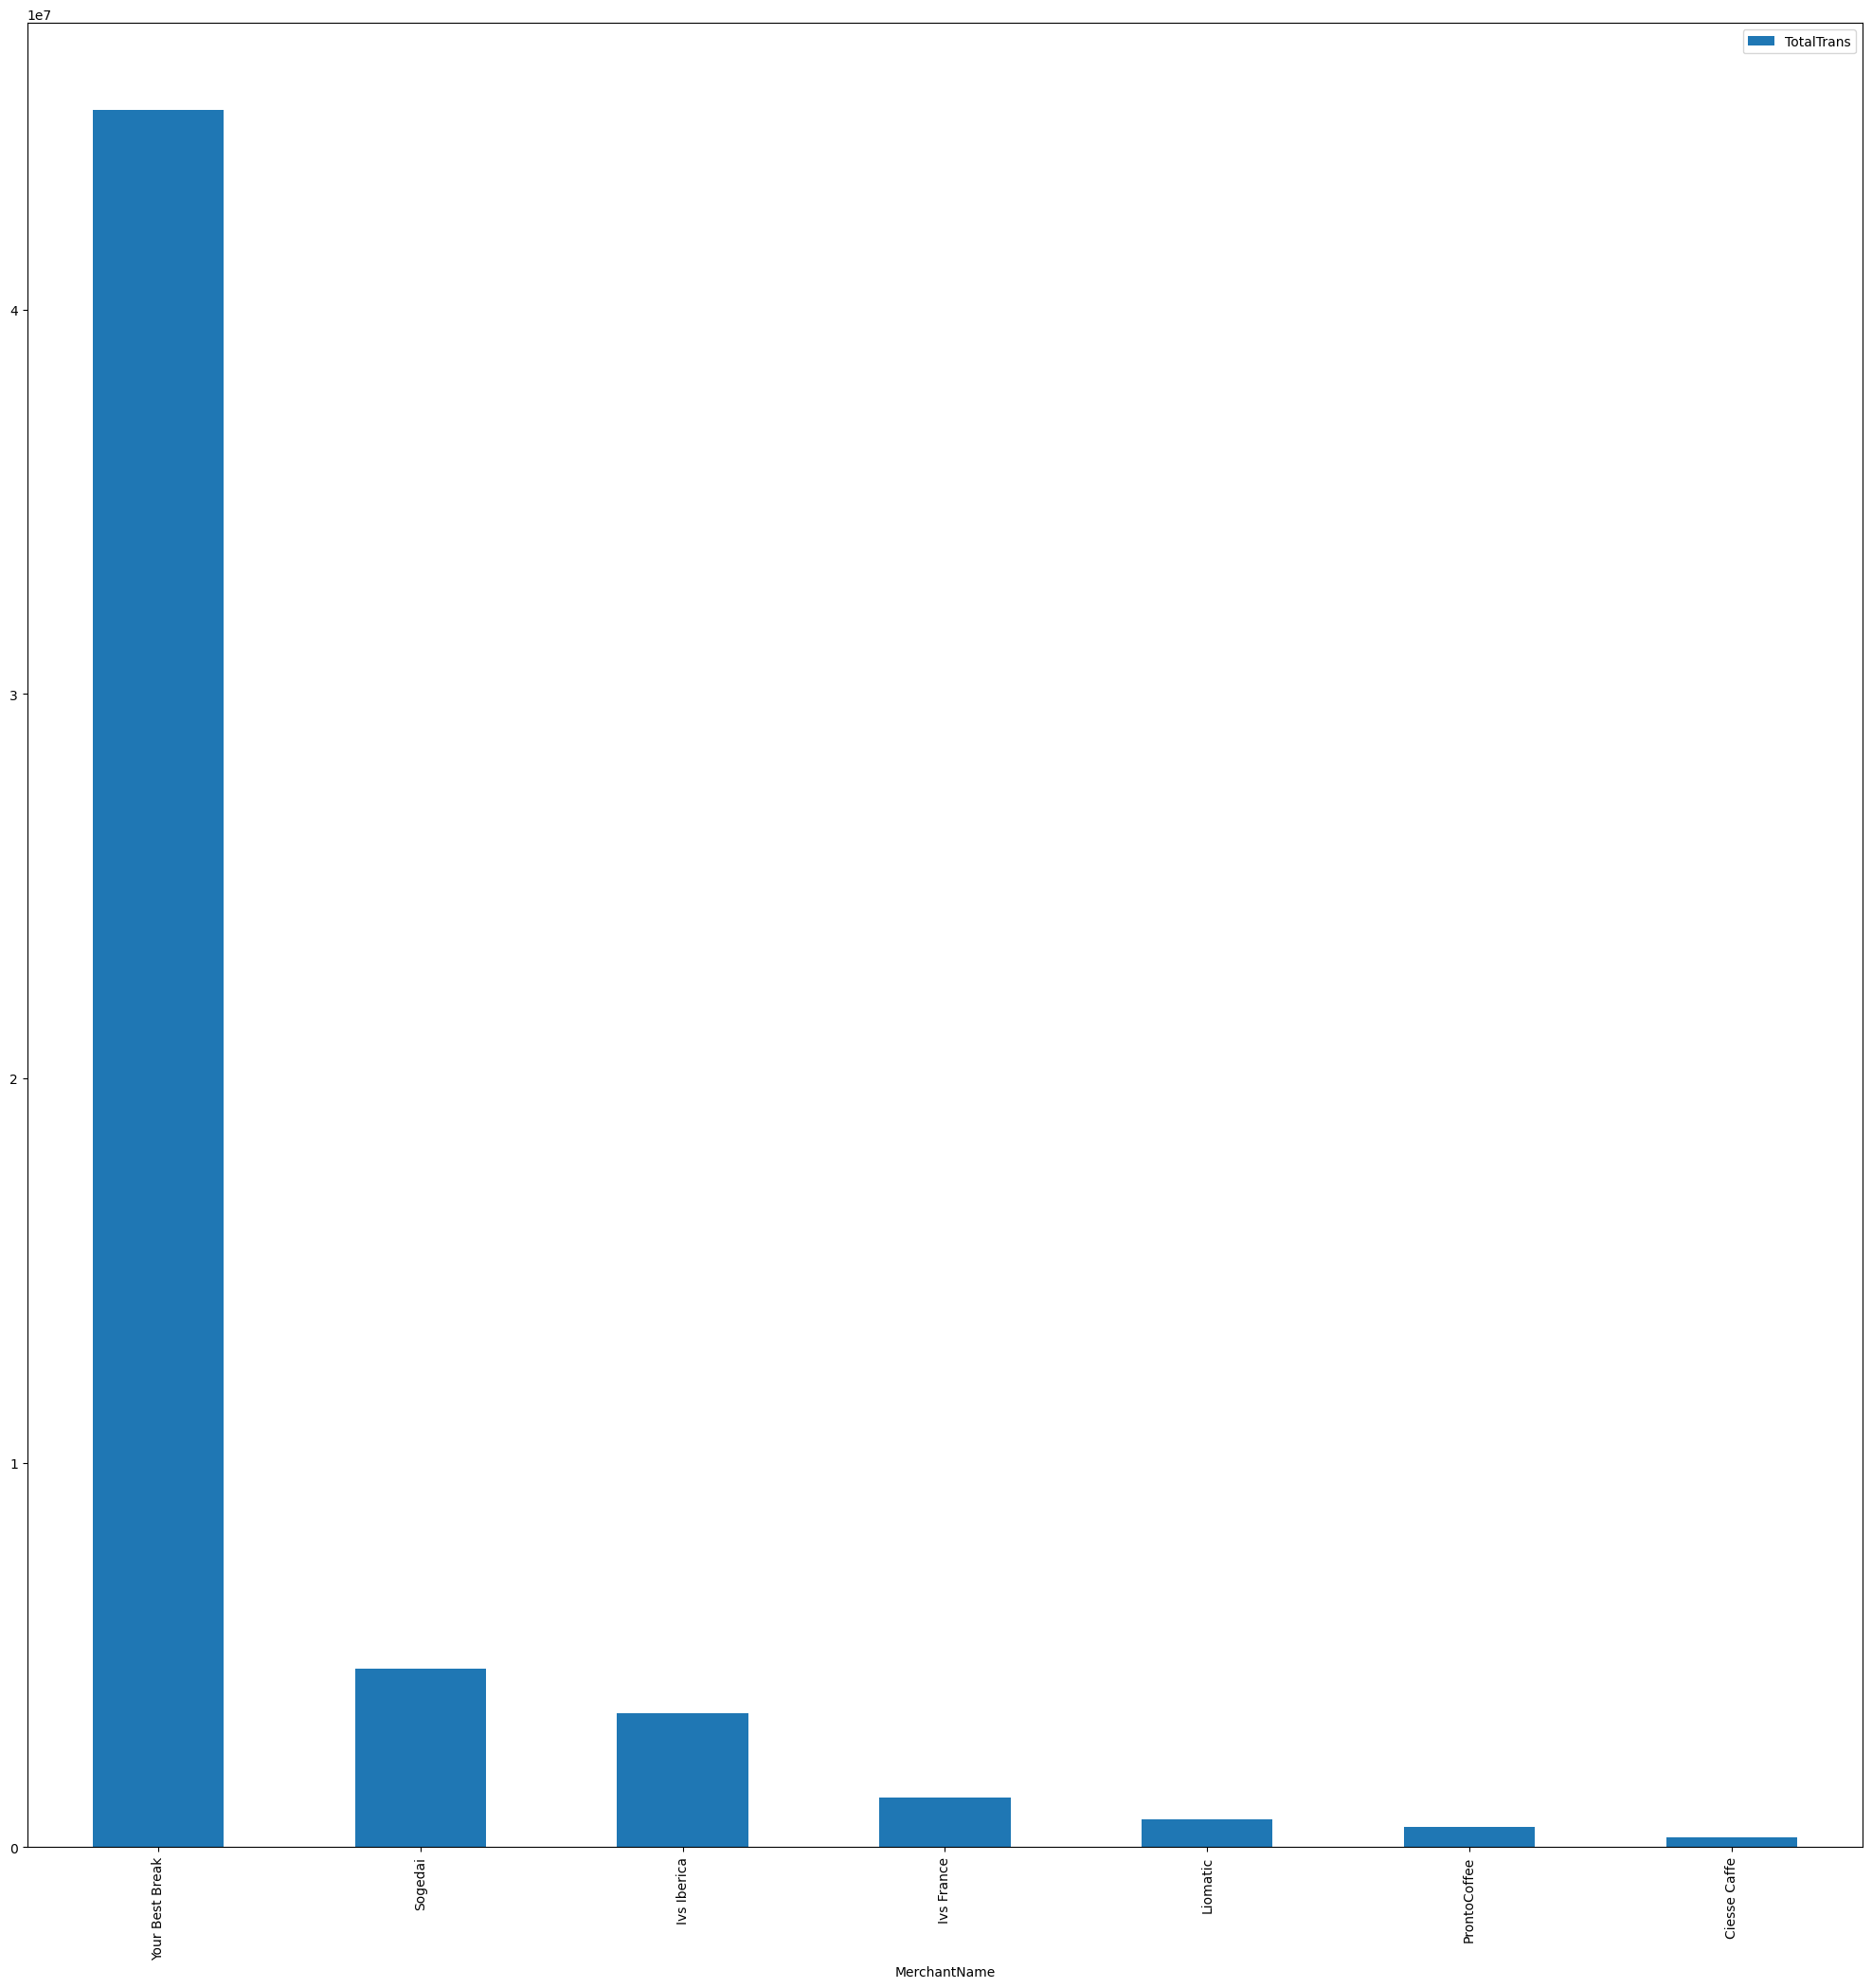

In [86]:
df_coffee3.plot(
  kind="bar",
  x="MerchantName",     
  y="TotalTrans",
  figsize=(25, 25)
  )

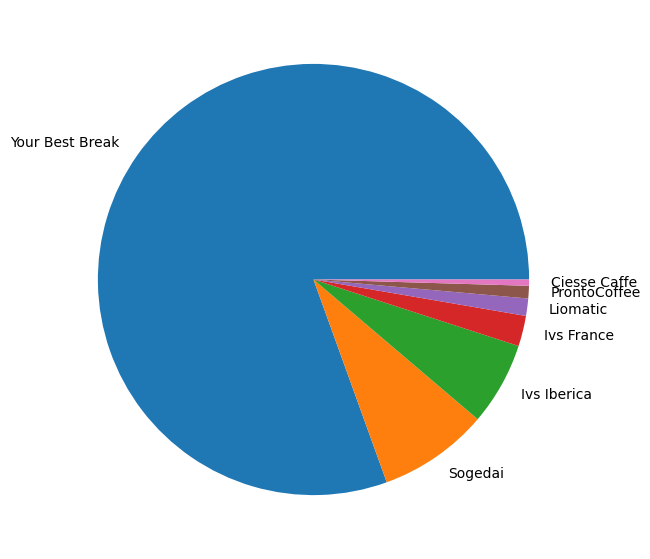

In [87]:
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(df_coffee3['TotalTrans'], labels = df_coffee3['MerchantName'])
 
# show plot
plt.show()

<Axes: xlabel='MerchantName'>

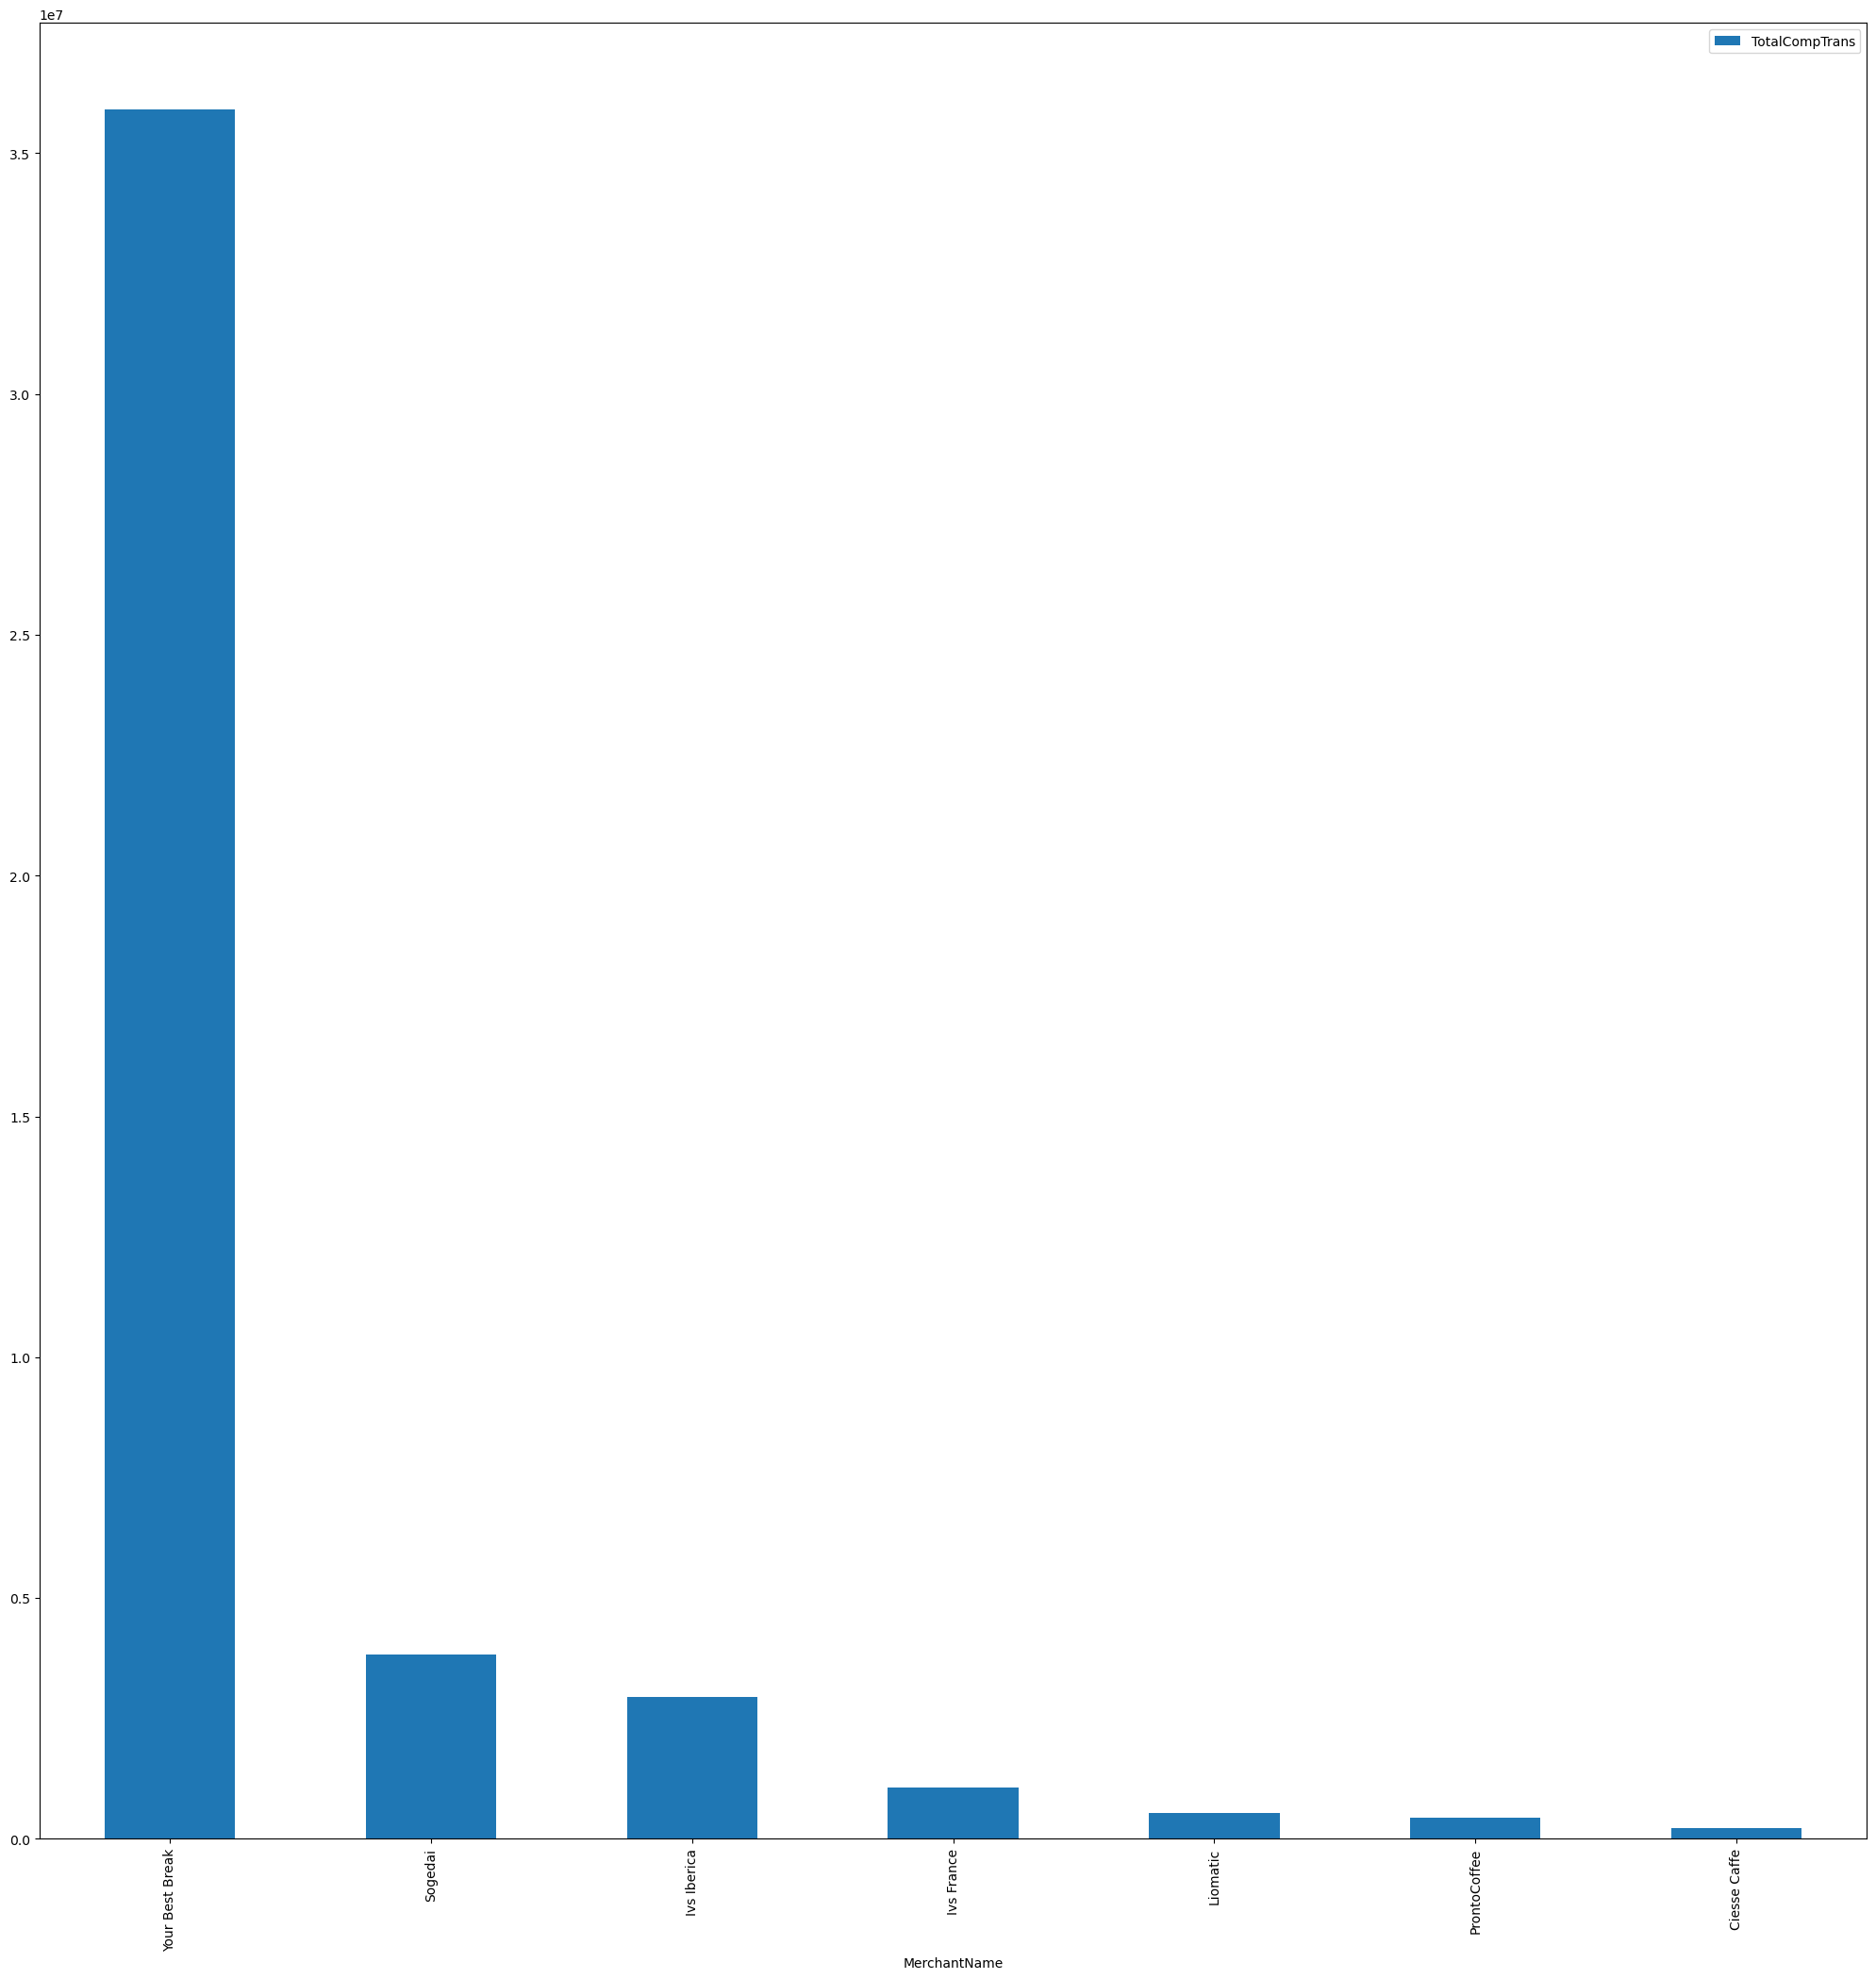

In [88]:
df_coffee3.plot(
  kind="bar",
  x="MerchantName",     
  y="TotalCompTrans",
  figsize=(25, 25)
  )